<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.06_without gamma.csv"

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv(path)

In [3]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]

In [4]:

from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)


In [5]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [7]:
featureScores

Specs      Score
0         n0_gap_peak_ms   5.355621
1         p1_gap_peak_ms   0.943330
2         n1_gap_peak_ms  10.975831
3         p2_gap_peak_ms   0.059269
4         n2_gap_peak_ms   2.251552
..                   ...        ...
122        MedianF_Delta  12.305675
123          MeanF_Delta  15.709564
124  Spectral Edge_Delta  16.818977
125          PeakF_Delta   0.259424
126          MeanP_Gamma   2.786991

[127 rows x 2 columns]

In [8]:
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                  Specs      Score
47      p3_gap_peak_amp  45.163320
72       gap_auc_n1p2_R  45.064316
43      p1_gap_peak_amp  42.386323
46      n2_gap_peak_amp  39.547251
38  n1p3_interval_nogap  37.128241
74       gap_auc_n1p2_L  35.014730
69       gap_auc_p1n1_R  28.903982
33  p1p2_interval_nogap  27.769729


In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(8,'Score'))

                  Specs      Score
47      p3_gap_peak_amp  45.163320
72       gap_auc_n1p2_R  45.064316
43      p1_gap_peak_amp  42.386323
46      n2_gap_peak_amp  39.547251
38  n1p3_interval_nogap  37.128241
74       gap_auc_n1p2_L  35.014730
69       gap_auc_p1n1_R  28.903982
33  p1p2_interval_nogap  27.769729


In [10]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00765617 0.00782089 0.00622426 0.00654786 0.00991867 0.00666734
 0.00618231 0.00623031 0.00477351 0.00675802 0.00716058 0.00973391
 0.00659541 0.00738873 0.00665805 0.00649959 0.00757094 0.01041955
 0.00762786 0.00795029 0.00612584 0.0070407  0.00751952 0.00562572
 0.00920153 0.00679618 0.00616626 0.00634188 0.00560579 0.00646949
 0.00806654 0.00556716 0.00564721 0.01125655 0.00855593 0.00526992
 0.00511647 0.00710486 0.01236224 0.00940437 0.01599455 0.00698731
 0.00923749 0.0178846  0.00878113 0.00770732 0.00883652 0.02054836
 0.0062375  0.00617243 0.00811006 0.00726766 0.00998009 0.00605266
 0.01335033 0.00608403 0.0065522  0.00598564 0.00976608 0.01136977
 0.00926744 0.00755259 0.00840296 0.00544108 0.00597253 0.01032303
 0.01021332 0.00770468 0.0084756  0.01366827 0.00736493 0.00580645
 0.01460781 0.00454722 0.01360692 0.00514788 0.01192477 0.0081701
 0.00612377 0.00749806 0.00563149 0.00605197 0.00793153 0.0067095
 0.00550547 0.00676032 0.00660638 0.0070934  0.00610395 0.008358

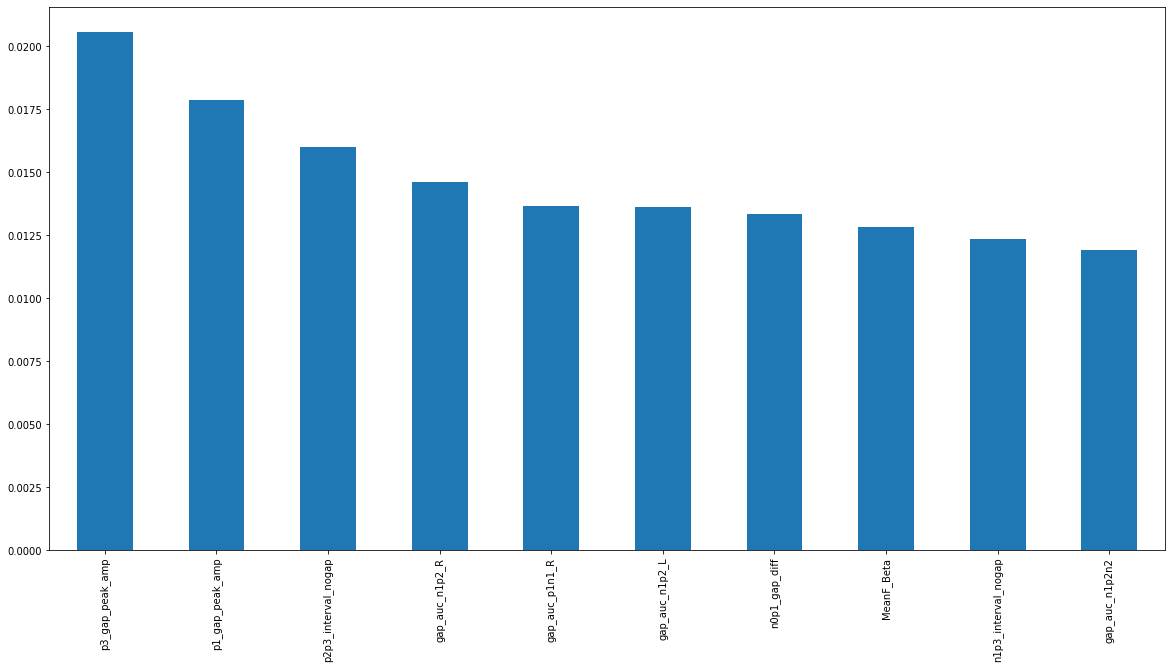

                  Specs      Score
47      p3_gap_peak_amp  45.163320
72       gap_auc_n1p2_R  45.064316
43      p1_gap_peak_amp  42.386323
46      n2_gap_peak_amp  39.547251
38  n1p3_interval_nogap  37.128241
74       gap_auc_n1p2_L  35.014730
69       gap_auc_p1n1_R  28.903982
33  p1p2_interval_nogap  27.769729
76       gap_auc_n1p2n2  26.659414
65  p2n2_gap_nogap_diff  24.767763


In [11]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
plt.show()
print(featureScores.nlargest(10,'Score'))

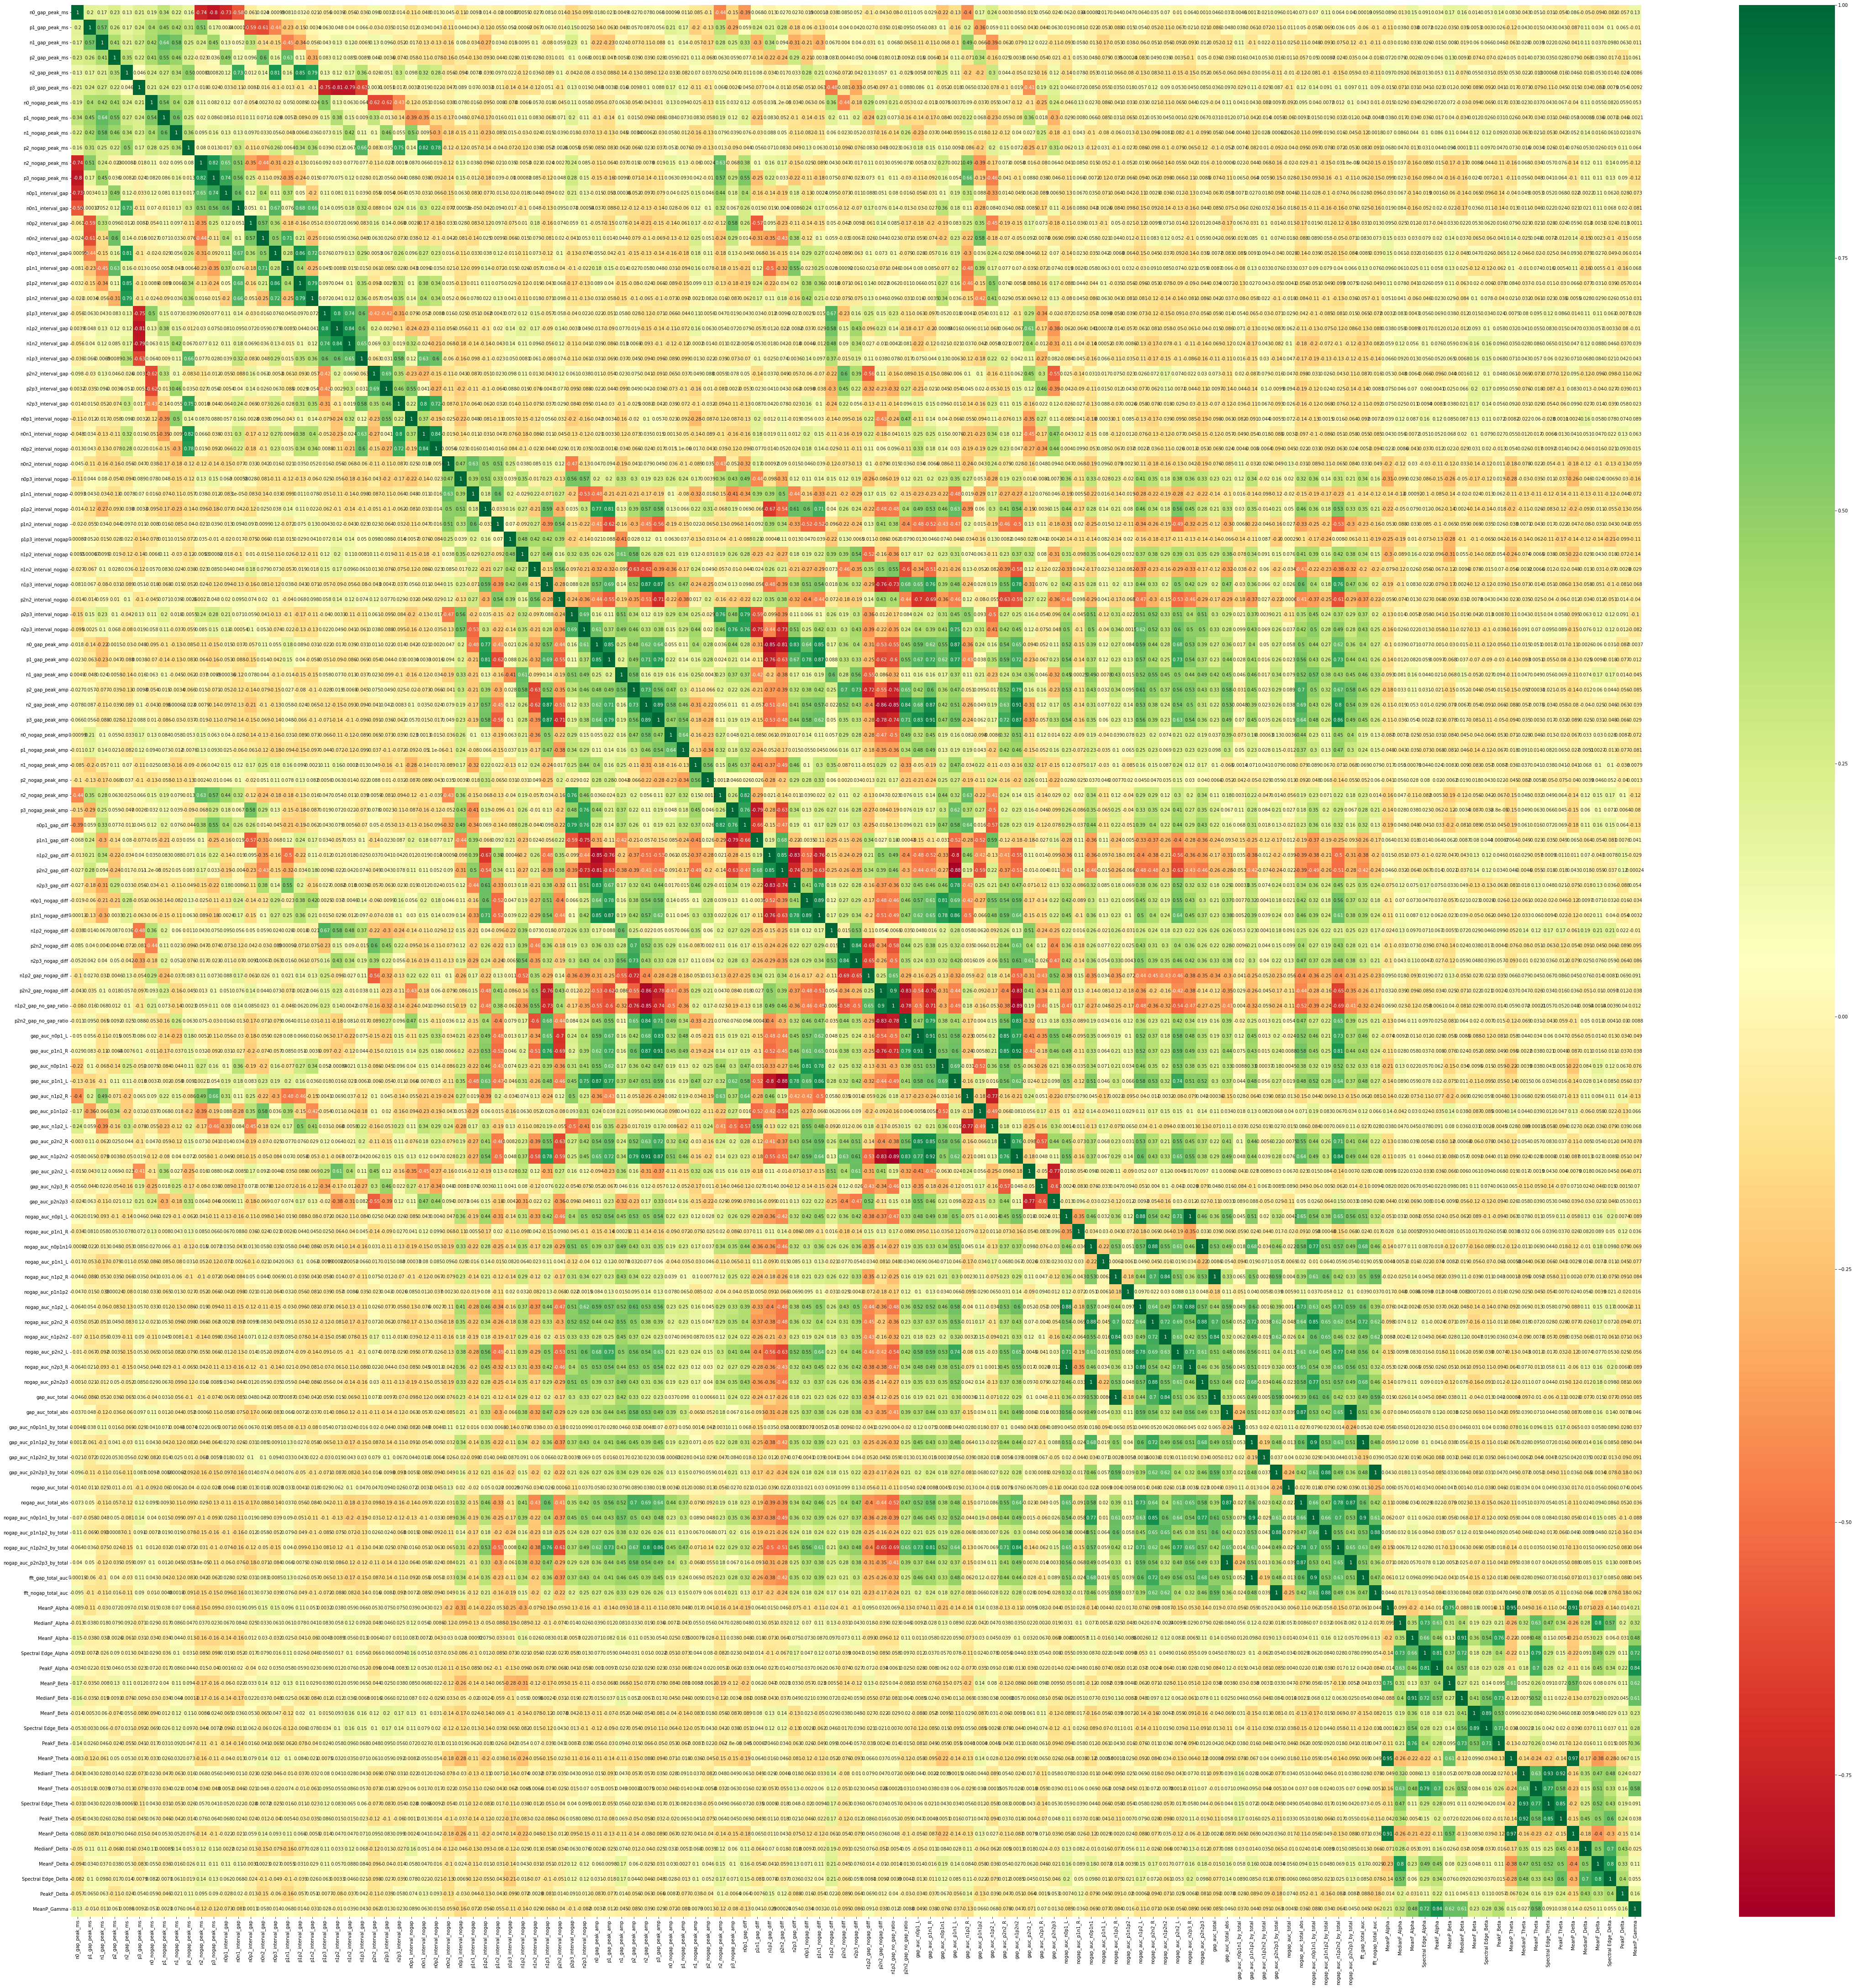

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")